In [98]:
import numpy as np
import matplotlib.pyplot as plt

In [118]:
energyPos = 0
energyNeg = 0
targetSuccesses = 2
sampleSize = 10**6
#       d4 d6 d8 d10 d12
dice = [4, 6, 8, 10, 12]
dPos = [0, 0, 2, 2,  0]
dNeg = [0, 0, 0, 2,  0]

In [119]:
dPosString = ''
for i in range(len(dPos)):
        if dPos[i]>0:
            dPosString += str(dPos[i])+'d'+str(2+2*i)+' '
if len(dPosString) == 0: dPosString = '0 '

dNegString = ''
for i in range(len(dNeg)):
        if dNeg[i]>0:
            dNegString += str(dNeg[i])+'d'+str(2+2*i)+' '
if len(dNegString) == 0: dNegString = '0 '

In [120]:
rng = np.random.default_rng()
posMat = {}
negMat = {}
for i,d in enumerate(dice):
    posMat[str(d)] = rng.integers(low=1, high=d+1, size=(sampleSize, dPos[i]))
    negMat[str(d)] = rng.integers(low=1, high=d+1, size=(sampleSize, dNeg[i]))

In [121]:
posSucc = {}
for d,rolls in posMat.items():
    successArr = []
    for roll in rolls:
        sEnergy = energyPos
        successes = 0
        for die in roll:
            if die > 3:
                successes+=1
            elif die > 2 and sEnergy > 0:
                successes+=1
                sEnergy-=1
        successArr.append(successes)
    posSucc[str(d)] = successArr
    
negSucc = {}
for d,rolls in negMat.items():
    successArr = []
    for roll in rolls:
        sEnergy = energyNeg
        successes = 0
        for die in roll:
            if die > 3:
                successes+=1
            elif die > 2 and sEnergy > 0:
                successes+=1
                sEnergy-=1
        successArr.append(successes)
    negSucc[str(d)] = successArr

In [122]:
netSuccAll = np.zeros(len(posSucc[list(posSucc.keys())[0]]))
for d in posSucc.keys():
    netSucc = np.array(posSucc[d]) - np.array(negSucc[d])
    netSuccAll += netSucc
threshCount = len(netSuccAll[netSuccAll>=targetSuccesses])
total = len(posSucc[list(posSucc.keys())[0]])
prob = threshCount/total

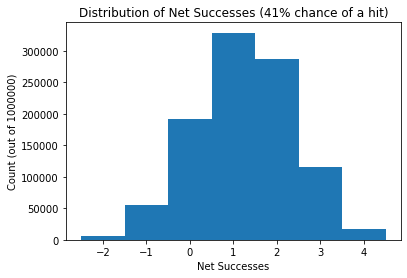

In [123]:
bins = np.arange(netSuccAll.min(), netSuccAll.max()+2, 1)
plt.hist(netSuccAll, bins, align='left')
plt.title('Distribution of Net Successes (%d%% chance of a hit)'%(prob*100))
plt.xlabel('Net Successes')
plt.ylabel('Count (out of %d)'%total)
plt.show()